In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# budget = pd.read_csv("TB_budget_2024-02-12.csv")
expenditure = pd.read_csv("data/TB_expenditure_utilisation_2024-02-21.csv")
burden = pd.read_csv("data/TB_burden_countries_2024-02-12.csv")
outcome = pd.read_csv("data/TB_outcomes_2024-02-12.csv")
rr_burden = pd.read_csv("data/MDR_RR_TB_burden_estimates_2024-02-12.csv")

In [71]:
rr_burden = rr_burden[['country', 'year',  "e_rr_pct_new", "e_rr_pct_ret", 'source_rr_new', "source_rr_ret"]]

In [72]:
burden = burden[['country', 'year', 'e_inc_num']]

In [73]:
outcome = outcome[['country', 'year', 'c_new_tsr', 'mdr_coh', 'mdr_succ']]

In [87]:
expenditure = expenditure[['country', 'year', "exp_fld", "exp_sld",
                        "exp_lab", "exp_orsrvy","exp_oth",
                        "exp_patsup", "exp_staff"]]

In [88]:
merged = expenditure.merge(burden, on=['country', 'year'])
merged = merged.merge(rr_burden, on=['country', 'year'])
merged = merged.merge(outcome, on=['country', 'year'])
merged['c_tsr_resist'] = 100 * merged['mdr_succ']/merged['mdr_coh']

In [89]:
merged

,country,year,exp_fld,exp_sld,exp_lab,exp_orsrvy,exp_oth,exp_patsup,exp_staff,e_inc_num,e_rr_pct_new,e_rr_pct_ret,source_rr_new,source_rr_ret,c_new_tsr,mdr_coh,mdr_succ,c_tsr_resist
0,Afghanistan,2017,3073211.0,417694.0,2463321.0,839482.0,1805071.0,38000.0,625971.0,67000,4.6,11.0,Model,Surveillance,91.0,194.0,124.0,63.917526
1,Afghanistan,2018,2828527.0,453231.0,1471438.0,60000.0,NaN,430132.0,706095.0,69000,4.5,14.0,Model,Surveillance,91.0,327.0,225.0,68.807339
2,Afghanistan,2019,1271127.0,1029396.0,2165197.0,168000.0,4163413.0,390027.0,1956088.0,71000,4.4,19.0,Model,Surveillance,91.0,396.0,282.0,71.212121
3,Afghanistan,2020,2674973.0,2604180.0,1540184.0,0.0,2833819.0,328205.0,509385.0,71000,4.3,24.0,Model,Surveillance,95.0,315.0,234.0,74.285714
4,Afghanistan,2021,0.0,0.0,877231.0,NaN,2284074.0,50737.0,289874.0,74000,4.3,31.0,Model,Surveillance,93.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,Zimbabwe,2017,609863.0,678255.0,2298314.0,NaN,NaN,163440.0,1914270.0,33000,4.1,20.0,Survey & Surveillance,Survey & Surveillance,83.0,439.0,237.0,53.986333
1071,Zimbabwe,2018,1773922.0,1828181.0,1948619.0,247194.0,601604.0,96163.0,1339551.0,32000,3.5,20.0,Survey & Surveillance,Survey & Surveillance,84.0,381.0,192.0,50.393701
1072,Zimbabwe,2019,1027306.0,603180.0,1731680.0,122767.0,0.0,147692.0,1556935.0,31000,2.9,20.0,Survey & Surveillance,Survey & Surveillance,84.0,329.0,141.0,42.857143
1073,Zimbabwe,2020,219316.0,93573.0,576015.0,25906.0,0.0,71166.0,2073781.0,29000,2.5,20.0,Survey & Surveillance,Survey & Surveillance,88.0,210.0,88.0,41.904762


<BarContainer object of 2 artists>

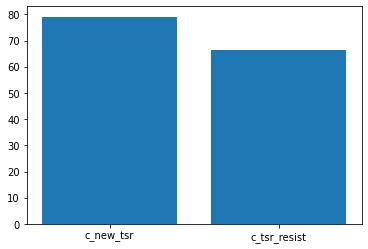

In [90]:
plt.bar(['c_new_tsr','c_tsr_resist'], merged[['c_new_tsr','c_tsr_resist']].mean())

In [91]:
merged["year"].value_counts()

2017    215
2018    215
2019    215
2020    215
2021    215
Name: year, dtype: int64

In [92]:
merged.describe()

,year,exp_fld,exp_sld,exp_lab,exp_orsrvy,exp_oth,exp_patsup,exp_staff,e_inc_num,e_rr_pct_new,e_rr_pct_ret,c_new_tsr,mdr_coh,mdr_succ,c_tsr_resist
count,1075.000000,5.140000e+02,5.060000e+02,5.000000e+02,4.650000e+02,4.570000e+02,4.800000e+02,5.010000e+02,1.075000e+03,1075.000000,1075.000000,955.000000,734.000000,714.000000,607.000000
mean,2019.000000,2.562941e+06,4.046375e+06,3.214739e+06,4.661483e+05,5.281372e+06,1.188019e+06,1.455781e+07,4.769840e+04,3.722502,16.826298,79.070157,787.525886,487.698880,66.549956
std,1.414872,7.804326e+06,2.008251e+07,8.120383e+06,2.255677e+06,3.344902e+07,6.547678e+06,9.034844e+07,2.207908e+05,5.792817,13.617937,16.301930,4093.158138,2372.542015,22.762790
min,2017.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.260000,0.970000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,1.035662e+05,4.601550e+04,1.876820e+05,0.000000e+00,0.000000e+00,2.119600e+04,2.328070e+05,1.800000e+02,1.300000,7.900000,74.500000,2.000000,2.000000,55.399061
50%,2019.000000,4.027730e+05,2.250610e+05,8.229535e+05,2.382900e+04,1.802280e+05,1.078785e+05,8.717910e+05,2.700000e+03,2.100000,14.000000,83.000000,30.000000,22.500000,70.454545
75%,2020.000000,1.575012e+06,1.213245e+06,2.404922e+06,1.676280e+05,1.309836e+06,3.918862e+05,3.300000e+06,1.500000e+04,3.300000,20.000000,89.000000,184.750000,126.750000,80.259511
max,2021.000000,6.692966e+07,2.548537e+08,7.547487e+07,2.628732e+07,3.617290e+08,9.328951e+07,9.778924e+08,2.930000e+06,39.000000,97.000000,100.000000,60858.000000,34891.000000,100.000000


In [93]:
merged.to_pickle('data/mtb_cleaned_data_new.pkl')

In [97]:
corr_mat = merged[["e_rr_pct_new", "e_rr_pct_ret", 'c_new_tsr', 'c_tsr_resist', 
               "exp_fld", "exp_sld", "exp_lab","exp_orsrvy","exp_oth", 
               "exp_patsup", "exp_staff"]].corr().iloc[4:,0:4]

corr_mat.columns = ['Percent of New Resistant Cases', 'Percent of Treated Resistant Cases', 
                    'All New Case Treatment Success Rate', 'Resistant Case Treatment Success Rate']


corr_mat.index = ['Expenditure for Drug-susceptible TB', 'Expenditure for Drug-resistant TB', 
                  'Expenditure on Laboratory Infrastructure', 'Expenditure on Operational Research', 
                  'Expenditure on All Other Budget Line Items',
                  'Expenditure on Patient Support', 'Expenditure on National TB Programme staff ']

corr_mat = corr_mat.reset_index()

corr_mat = pd.melt(corr_mat, id_vars="index", value_name="Corr", var_name="TB Burden")
corr_mat.columns = ['Expenditure', 'TB Burden', 'Corr']
corr_mat

,Expenditure,TB Burden,Corr
0,Expenditure for Drug-susceptible TB,Percent of New Resistant Cases,-0.049275
1,Expenditure for Drug-resistant TB,Percent of New Resistant Cases,0.215167
2,Expenditure on Laboratory Infrastructure,Percent of New Resistant Cases,0.102191
3,Expenditure on Operational Research,Percent of New Resistant Cases,-0.024224
4,Expenditure on All Other Budget Line Items,Percent of New Resistant Cases,0.415528
5,Expenditure on Patient Support,Percent of New Resistant Cases,0.024508
6,Expenditure on National TB Programme staff,Percent of New Resistant Cases,0.416311
7,Expenditure for Drug-susceptible TB,Percent of Treated Resistant Cases,-0.027277
8,Expenditure for Drug-resistant TB,Percent of Treated Resistant Cases,0.176658
9,Expenditure on Laboratory Infrastructure,Percent of Treated Resistant Cases,0.075269
